In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("covid_clean.csv",index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123949 entries, 0 to 123948
Data columns (total 6 columns):
date      123949 non-null object
county    123949 non-null object
state     123949 non-null object
fips      123949 non-null float64
cases     123949 non-null int64
deaths    123949 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.6+ MB


In [324]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


So there is a clear correlation with number of cases to number of deaths as expected

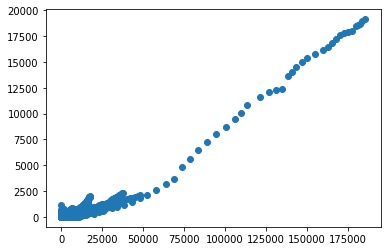

In [325]:
plt.scatter(df["cases"],df["deaths"])

Fips represent the code for counties, the plots for fips to cases and deaths seem to have a normal distribution,but there is a spike in cases and deaths for fip codes between 0 - 10,000 which is interesting and is an outlier compared to the rest of the data. 

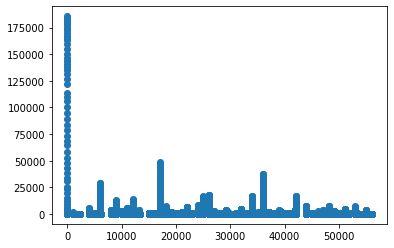

In [326]:
plt.scatter(df["fips"],df["cases"])

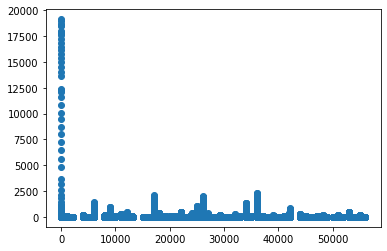

In [327]:
plt.scatter(df["fips"],df["deaths"])

These are the counties with fips less than 10000. The codes with the fips  = 0 are unknowns which was set from before. So the most deaths occured at counties not known and likely an aggregation of all the deaths from multiple counties. 

In [23]:
df.loc[df["fips"]<10000]

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
13,2020-01-27,Maricopa,Arizona,4013.0,1,0
...,...,...,...,...,...,...
123372,2020-05-07,Unknown,Tennessee,0.0,77,0
123619,2020-05-07,Unknown,Utah,0.0,1,3
123635,2020-05-07,Unknown,Vermont,0.0,4,0
123639,2020-05-07,Unknown,Virgin Islands,0.0,66,4


Unknown counties are usually located in Missouri, New York

In [21]:
df.loc[df["fips"] == 0].state.value_counts()

Missouri                    85
New York                    75
Rhode Island                68
New Jersey                  57
Puerto Rico                 56
Virgin Islands              55
Guam                        54
Massachusetts               53
Louisiana                   51
Arkansas                    49
Georgia                     48
Colorado                    47
Maine                       46
Illinois                    46
Vermont                     46
Florida                     44
Nevada                      43
Michigan                    43
Minnesota                   42
Utah                        42
Kentucky                    41
Northern Mariana Islands    41
Connecticut                 39
New Hampshire               30
Virginia                    27
Delaware                    27
Hawaii                      25
Maryland                    23
Tennessee                   22
Iowa                        16
California                  15
Washington                  14
Nebraska

New York has the most deaths as expected, it also seems that east coast states are likely to have more deaths in general

In [22]:
pd.pivot_table(df, index= ["state"],values=["deaths","cases"]).sort_values("deaths",ascending=False)

,cases,deaths
state,,
New York,3019.985338,202.377541
New Jersey,2591.627755,131.094694
Connecticut,1482.940043,102.695931
Massachusetts,1711.659039,82.532037
District of Columbia,1773.403226,72.548387
Puerto Rico,748.767857,38.714286
Michigan,330.229940,25.326907
Rhode Island,657.232639,20.274306
Maryland,418.702333,18.197908


This is a correlation map. This tells us how correlated our feature are in comparision with each other. According to the map fips(county code) is not correlated with cases or deaths. Which is suprising,but it is likely due to missing data. Cases and deaths are heavily correlated as expected

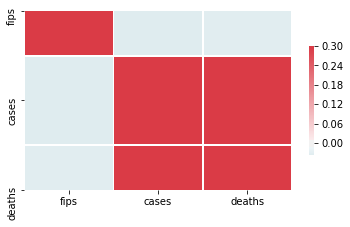

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[[i for i in df.columns]].corr(),vmax=.3, center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Time series analysis
Want to see deaths/cases over a time period

In [3]:
sequences = pd.read_csv("covid19_clean.csv",index_col=0)

In [4]:
sequences['date'] = pd.to_datetime(sequences['date'])

In [5]:
sequences.set_index("date")

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...
2020-05-07,Sublette,Wyoming,56035.0,3,0
2020-05-07,Sweetwater,Wyoming,56037.0,19,0
2020-05-07,Teton,Wyoming,56039.0,98,1


In [6]:
sequences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123949 entries, 0 to 123948
Data columns (total 6 columns):
date      123949 non-null datetime64[ns]
county    123949 non-null object
state     123949 non-null object
fips      123949 non-null float64
cases     123949 non-null int64
deaths    123949 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.6+ MB


In [6]:
death = sequences.loc[sequences["deaths"]>0]

In [7]:
death["date"].min()

Timestamp('2020-02-29 00:00:00')

In [8]:
death["date"].max()

Timestamp('2020-05-07 00:00:00')

so time stamp is 2020-01-21 - 2020-03-29

In [9]:
death.drop("fips",axis=1,inplace=True)
death.sort_values("date")

,date,county,state,cases,deaths
394,2020-02-29,King,Washington,4,1
421,2020-03-01,King,Washington,11,3
453,2020-03-02,King,Washington,15,6
488,2020-03-03,King,Washington,22,10
501,2020-03-04,Placer,California,2,1
...,...,...,...,...,...
121928,2020-05-07,Johnson,Kansas,560,45
121914,2020-05-07,Ford,Kansas,933,2
121913,2020-05-07,Finney,Kansas,630,3
121992,2020-05-07,Carlisle,Kentucky,2,1


In [10]:
death.isnull().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [10]:
death = death.groupby("date")["deaths"].sum().reset_index()

In [13]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
date      69 non-null datetime64[ns]
deaths    69 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [11]:
death = death.set_index("date")
death.index

DatetimeIndex(['2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
      

In [15]:
death['deaths']

date
2020-02-29        1
2020-03-01        3
2020-03-02        6
2020-03-03       10
2020-03-04       12
              ...  
2020-05-03    67783
2020-05-04    68843
2020-05-05    71077
2020-05-06    74023
2020-05-07    75744
Name: deaths, Length: 69, dtype: int64

In [13]:
y = death['deaths'].resample('D').mean()

In [17]:
y

date
2020-02-29        1
2020-03-01        3
2020-03-02        6
2020-03-03       10
2020-03-04       12
              ...  
2020-05-03    67783
2020-05-04    68843
2020-05-05    71077
2020-05-06    74023
2020-05-07    75744
Freq: D, Name: deaths, Length: 69, dtype: int64

The deaths spiked toward the April to early May.Want to try to predict the deaths based on this trend

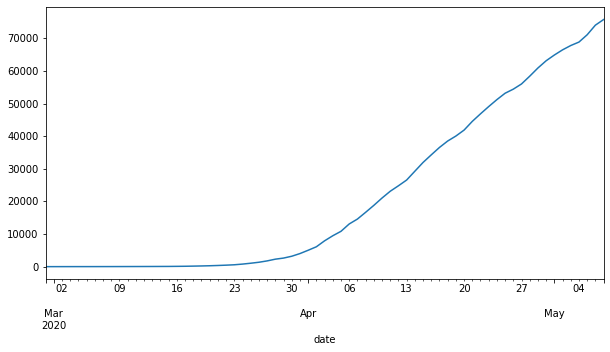

In [15]:
y.plot(figsize=(10,5))
plt.show()

In [14]:
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


We will decompose our moving averages into seasonalality,trend, and noise. When deal with time series analysis our models are usually based on the assumption on the combination of Trend,Seasonality, and Noise.

I will use a multiplicative model because the amount of cases and deaths variance is increasing over time. It seems to grow exponentially instead of linearly.
Additive model has the form y(t) = level + trend + seasonality + noise
Multiplicative model has the form y(t) = level * trend * seasonality * noise

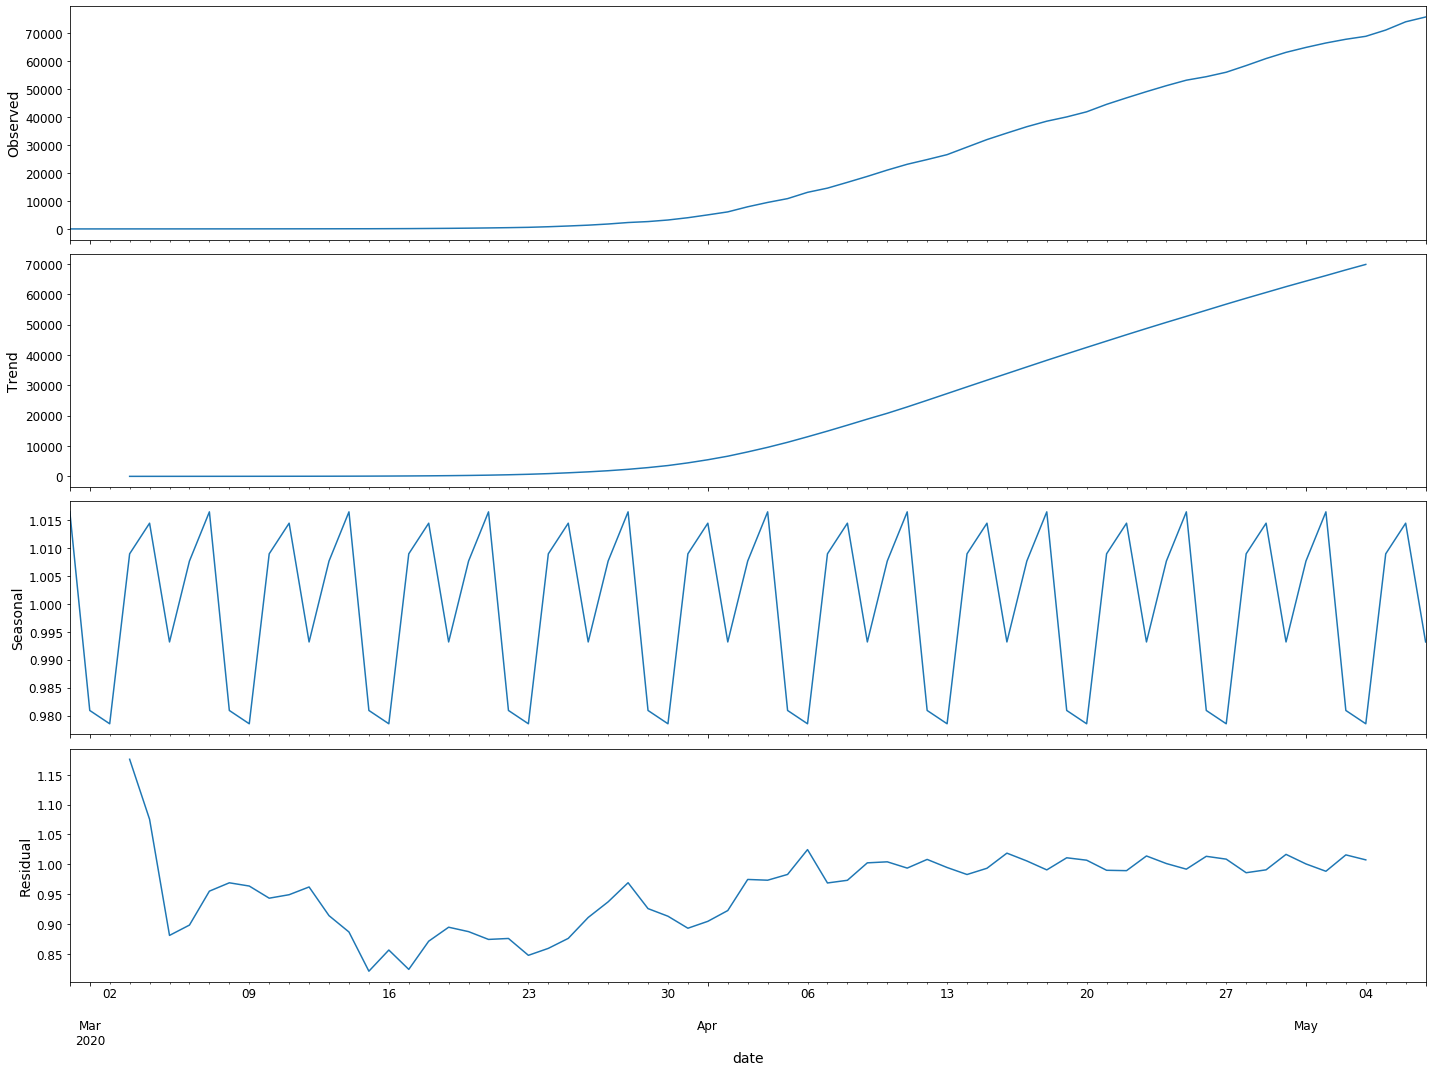

In [16]:
decomposition_deaths = sm.tsa.seasonal_decompose(y,model='multiplicative')
fig = decomposition_deaths.plot()
plt.show()

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15

Same procedure for cases

In [17]:
case = sequences.loc[sequences["cases"]>0]

In [18]:
case.sort_values("date")

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
122012,2020-05-07,Graves,Kentucky,21083.0,145,14
122013,2020-05-07,Grayson,Kentucky,21085.0,93,6
122014,2020-05-07,Green,Kentucky,21087.0,1,0
122016,2020-05-07,Hancock,Kentucky,21091.0,6,0


In [19]:
case = case.groupby("date")["cases"].sum().reset_index()

In [20]:
case = case.set_index('date')
case.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
               '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', name='date', length=108, freq=None)

In [21]:
x = case["cases"].resample('D').mean()

As expected the cases and deaths plots appear to be similar

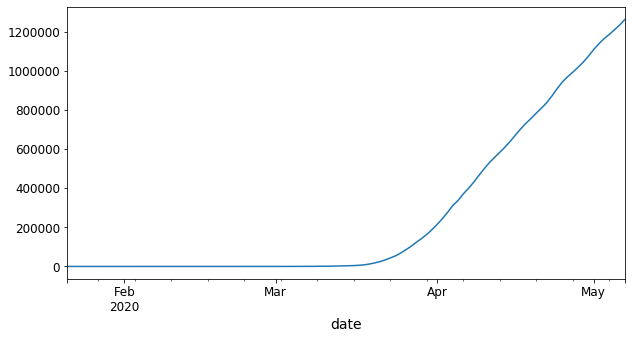

In [26]:
x.plot(figsize=(10,5))
plt.show()

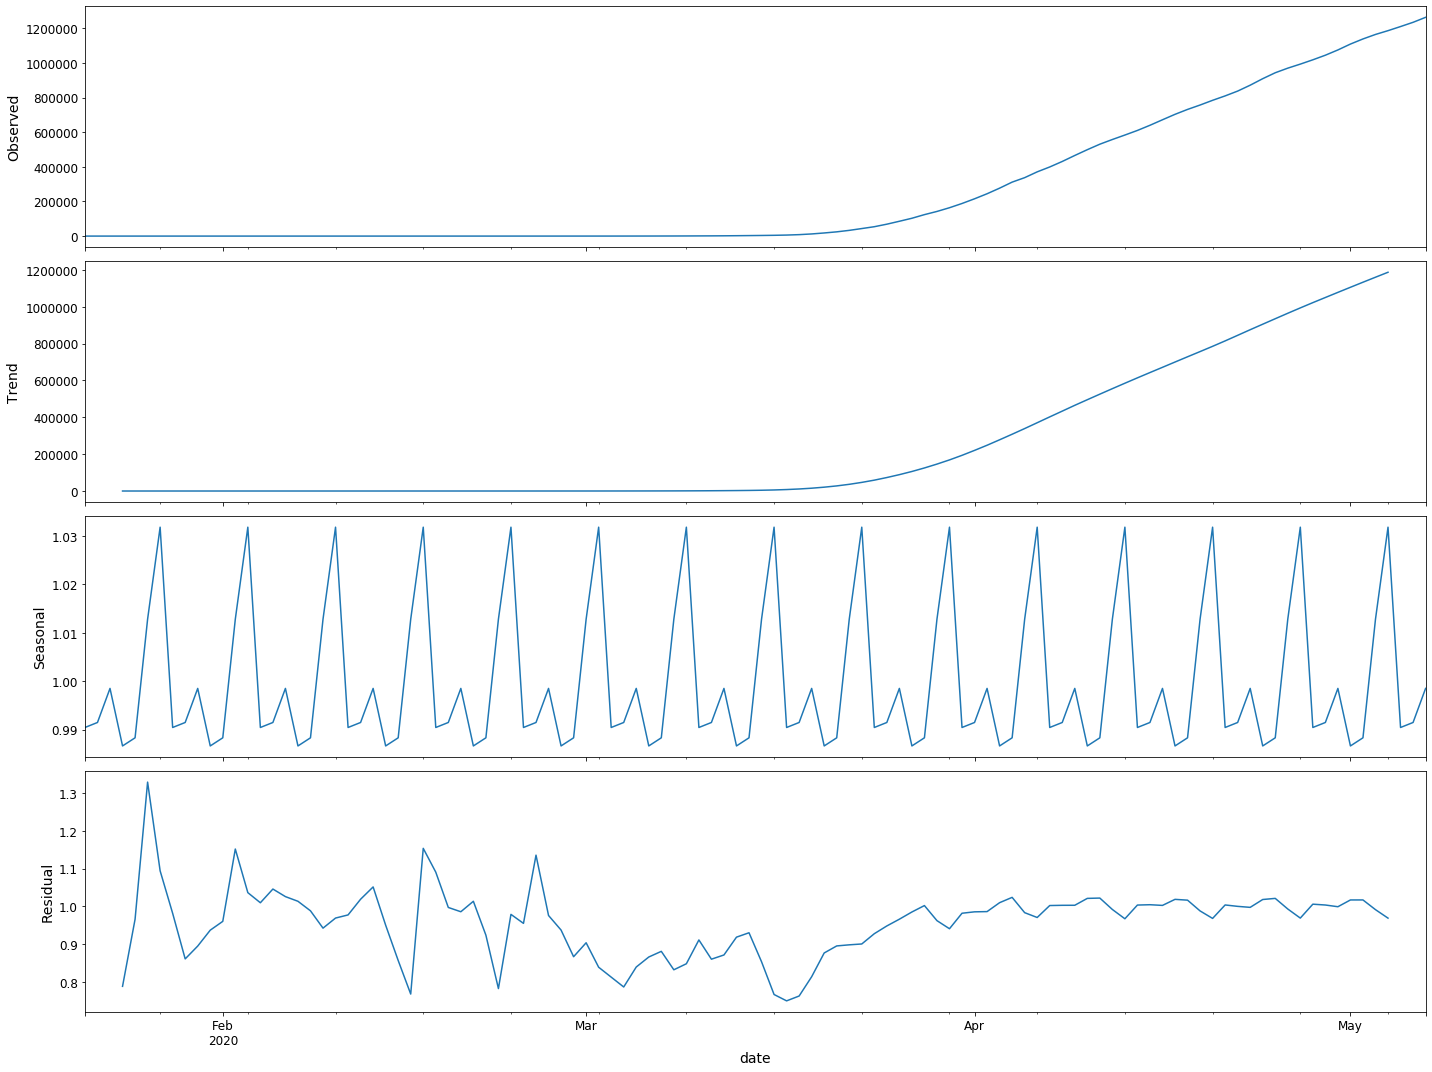

In [22]:
decomposition_cases = sm.tsa.seasonal_decompose(x,model='multiplicative')
fig = decomposition_cases.plot()
plt.show()

We will try to apply moving average/ARIMA to forcast and predict the current trend for COVID-19
Our ARIMA(Autoregression Intergrated Moving Average) model will take parameters p(lag order),d(degree of diffencing), q(order of moving average).

In [328]:
df['date'].isnull().sum() # just want to check we have no missing values for dates

0

We need to find the best parameters to use for our model

In [23]:
from itertools import product
p = d = q = range(0,2) # let p, d, q take values from 0 to 3
combinations = list(product(p,d,q)) # this will find the cartesian products/ordered pairs for p,d,q
#we will use SARIMAX which takes parameters p,d,q,s(number of periods in seasons) we use 12 since we are dealing with months
sets = [(i[0],i[1],i[2],12) for i in list(product(p,d,q))]


In [24]:
for param in combinations:
    for seasonal_param in sets:
        
            model=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=seasonal_param,
                                     enforce_stationarity = False, enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, seasonal_param, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1612.0550226565679
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1324.8150723965105
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1256.3273242631537
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:983.0601172365349
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1214.3086847660213
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1182.0422670892704
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:951.3675933919561
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:912.3251413506523
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1542.2036529086618
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1339.045591599716
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.9174915891097
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:932.7682771066977
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1301.4077342006922
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1257.420354925965
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:955.1228306585149
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:931.8742270831293
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1171.575967519006
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:931.4494699072301
AR

Our optimal parameters for deaths are (1, 1, 1)x(0, 1, 1, 12)12 which has the lowest AIC at 650.876
Same for cases which is (1, 1, 1)x(0, 1, 1, 12)12 as well.

In [25]:
for param in combinations:
    for seasonal_param in sets:
        
            model=sm.tsa.statespace.SARIMAX(x,order=param,seasonal_order=seasonal_param,
                                     enforce_stationarity = False, enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, seasonal_param, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3105.7189965404164
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2718.1211468095357
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2603.518637786981
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2247.7953312243144
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2516.569941645894
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2450.8878598907872
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2163.4585714857044
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2186.4173944873937
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3001.6341026299833
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2648.1718506351544
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2509.4497775674386
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2178.555941456008
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2698.6451175812426
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2643.7415443859377
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2228.163844203149
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2176.295936248082
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2381.5436628974458
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2081.61204610895

In [26]:
model = sm.tsa.statespace.SARIMAX(death,order=(1, 1, 1),seasonal_order = (0, 1, 1, 12),enforce_stationarity = False, enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             deaths   No. Observations:                   69
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -321.438
Date:                            Sat, 16 May 2020   AIC                            650.876
Time:                                    22:57:53   BIC                            657.827
Sample:                                02-29-2020   HQIC                           653.424
                                     - 05-07-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9587      0.054     17.657      0.000       0.852       1.065
ma.L1         -0.2588      0.141     -1.830      0.067      -0.536       0.018
ma.S.L12      -1.0006      0.225     -4.439      0.000      -1.442      -0.559
sigma2       1.98e+05   1.14e-06   1.74e+11      0.000    1.98e+05    1.98e+05
===================================================================================
Ljung-Box (Q):                       66.86   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.00   Prob(JB):                         0.60
Heteroskedasticity (H):               3.04   Skew:                             0.37
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.61e+26. Standard errors may be unstable.
"""

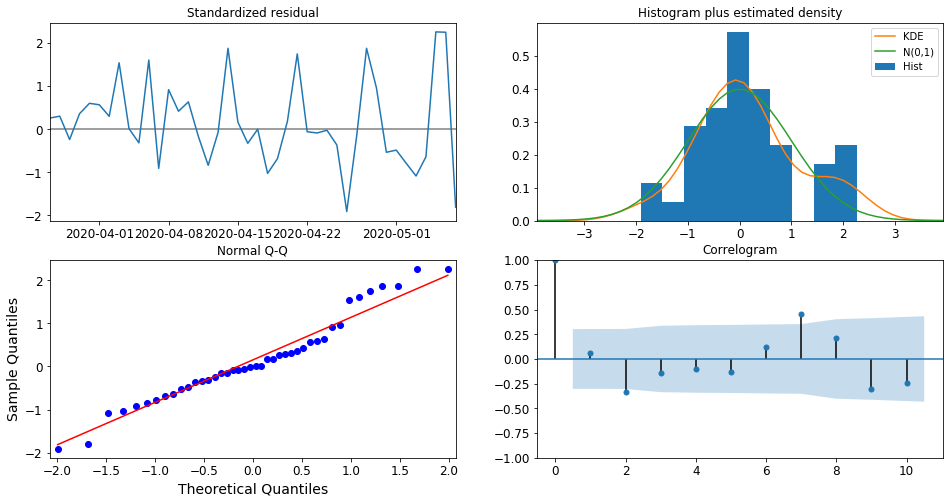

In [31]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [27]:
mod = sm.tsa.statespace.SARIMAX(case,order=(1, 1, 1),seasonal_order = (0, 1, 1, 12),enforce_stationarity = False, enforce_invertibility=False)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              cases   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -760.837
Date:                            Sat, 16 May 2020   AIC                           1529.674
Time:                                    22:57:59   BIC                           1539.251
Sample:                                01-21-2020   HQIC                          1533.516
                                     - 05-07-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9941      0.028     35.947      0.000       0.940       1.048
ma.L1          0.0707      0.104      0.679      0.497      -0.133       0.275
ma.S.L12      -0.9243      0.261     -3.536      0.000      -1.437      -0.412
sigma2      1.128e+07   1.93e-08   5.84e+14      0.000    1.13e+07    1.13e+07
===================================================================================
Ljung-Box (Q):                      101.03   Jarque-Bera (JB):                17.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            4393.43   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.94e+29. Standard errors may be unstable.
"""

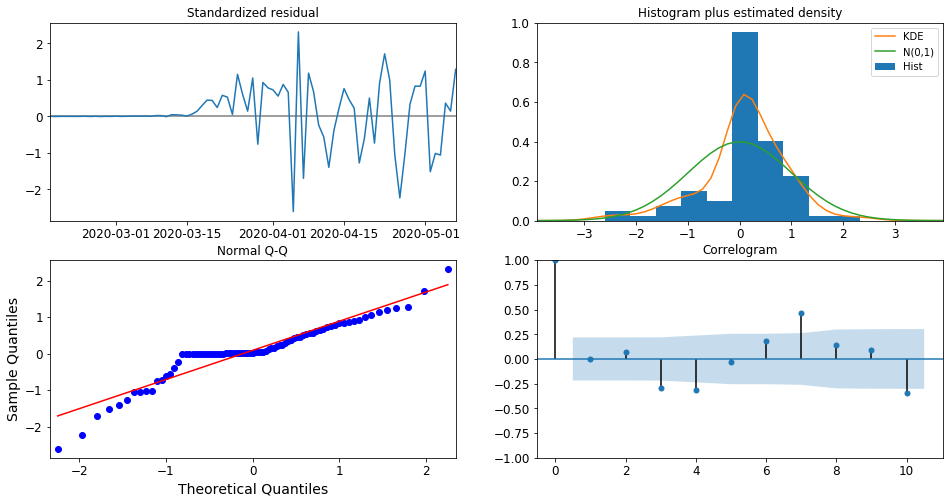

In [33]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

By looking at the plots we see that our model isn't too far off. We have normal distributions which is ideal

We can now forcasts to make predictions. We will set our forcasts to the the dates in our data to see how our predictions compare to the actual number of deaths and cases.

My forcast does not appear as I expected. However the deaths that I forcasted(yellow line)is not to far off from our deaths(blue line)

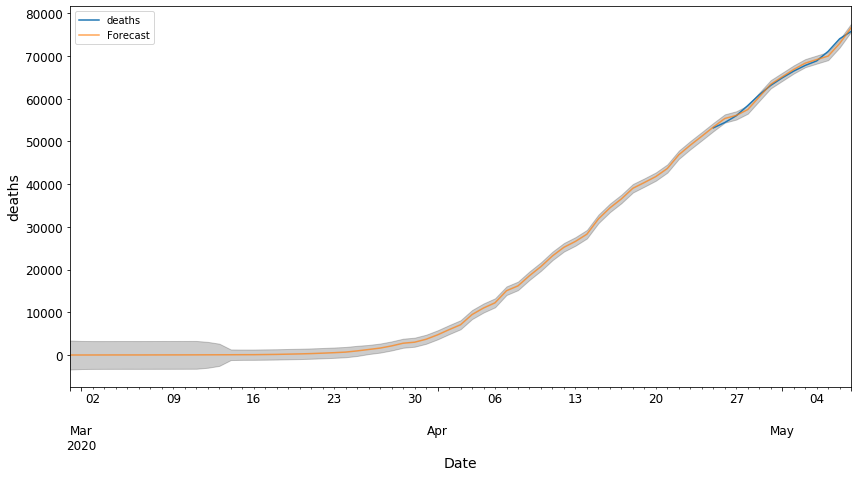

In [28]:
predicted_deaths = results.get_prediction(start=pd.to_datetime('2020-02-29'),dynamic=False)
# remember that our index for deaths begin at 2020-02-29, this is when deaths began
death_ci=predicted_deaths.conf_int()
ax = death['2020-04-25':].plot(label='observed')
predicted_deaths.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(death_ci.index,
                death_ci.iloc[:, 0],
                death_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('deaths')
plt.legend()
plt.show()


Doing the same thing for our cases this time we set it at '2020-01-21' since that when the cases began.

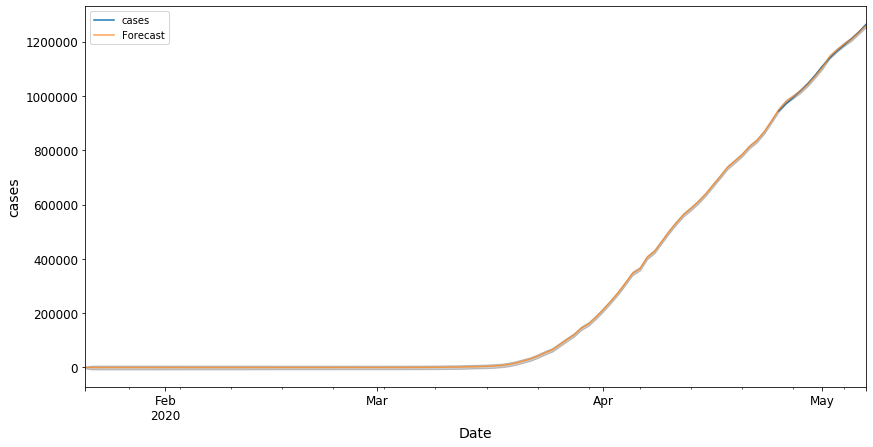

In [29]:
predicted_cases = result.get_prediction(start=pd.to_datetime('2020-01-21'),dynamic=False)
cases_ci=predicted_cases.conf_int()
ax = case['2020-04-25':].plot(label='observed')
predicted_cases.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(cases_ci.index,
                cases_ci.iloc[:, 0],
                cases_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('cases')
plt.legend()
plt.show()


want to try to cluster the deaths and cases based on the counties/states

In [30]:
from sklearn.cluster import KMeans

In [35]:
len(df['state'].value_counts())

55

In [39]:
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0


In [61]:
k_data = df.copy()
k_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0


I won't use the state,county, and date features since these are string and the date feature won't be helpful in clustering. I want to cluster deaths based on their location. I will use fips since it is numerical and provides the data for the location. I will use fips and cases as my input features to cluster deaths.

In [32]:
k_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0


In [62]:
x_k = k_data[["cases","deaths"]]
y_k = k_data["fips"]

In [63]:
x_k

,cases,deaths
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
123944,3,0
123945,19,0
123946,98,1
123947,8,0


KMeans is a unsupervised clustering algorithm that clusters data based on its properties

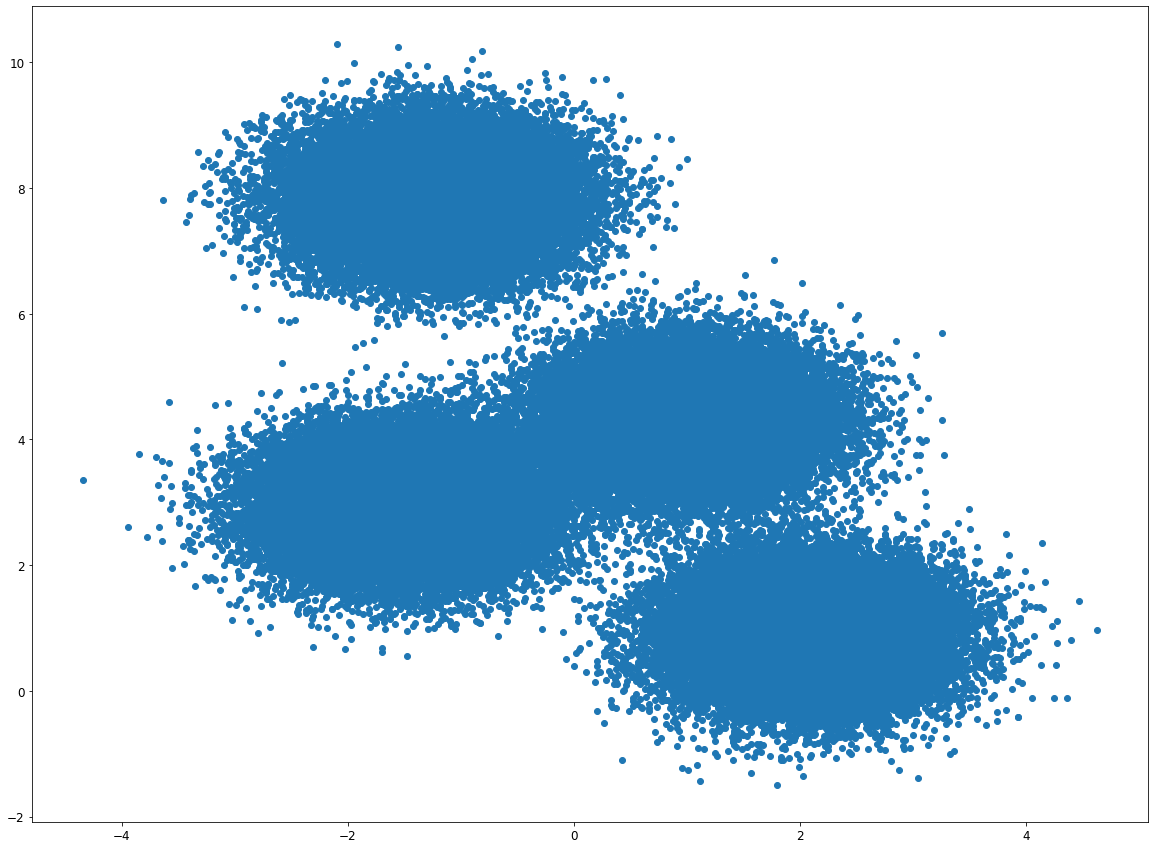

In [64]:
from sklearn.datasets.samples_generator import make_blobs
x_k,y_k = make_blobs(n_samples=123949, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(x_k[:, 0], x_k[:, 1]);


In [65]:
kmeans = KMeans(n_clusters = 4, random_state=25)
pred = kmeans.fit_predict(x_k)


In [66]:
df["deaths"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
123944    0
123945    0
123946    1
123947    0
123948    0
Name: deaths, Length: 123949, dtype: int64>

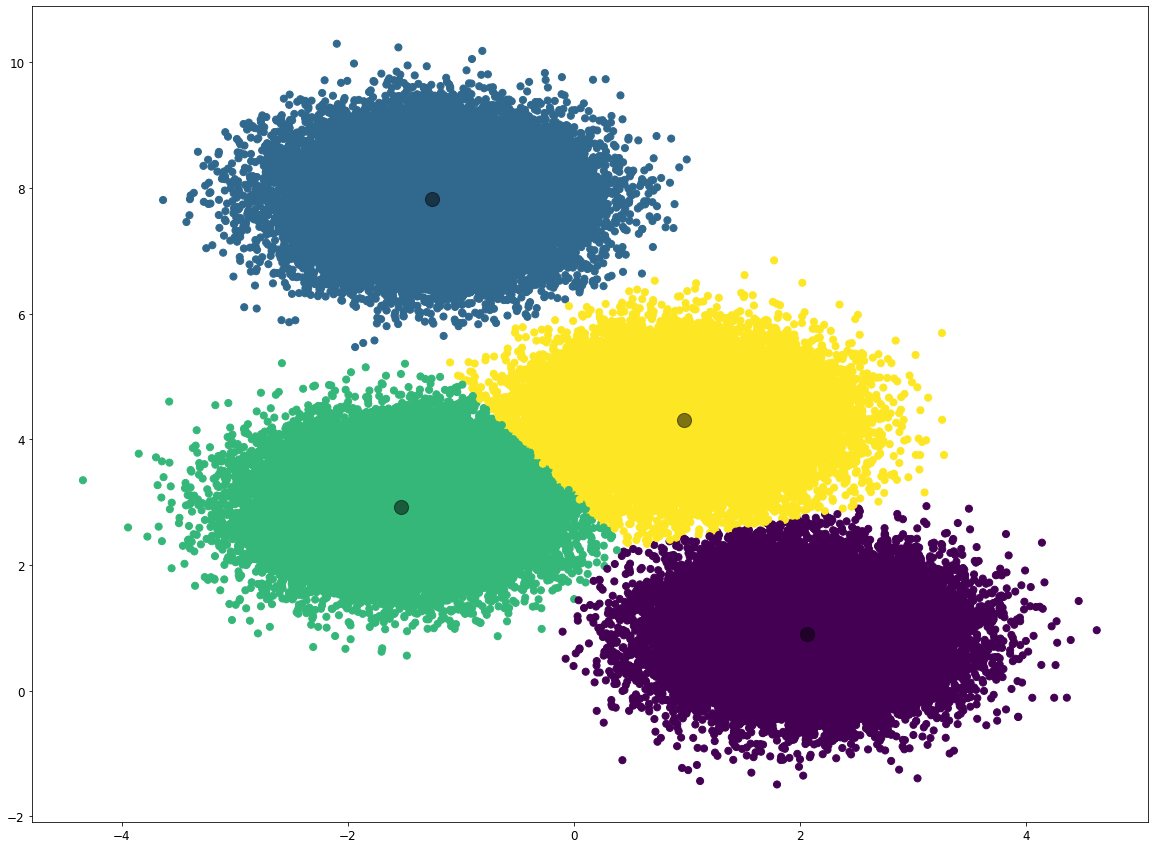

In [67]:
plt.scatter(x_k[:, 0], x_k[:, 1], c=pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [68]:
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0])

In [69]:
k_data[kmeans.labels_==0].deaths.sum()

340751

In [46]:
k_data[kmeans.labels_==1].deaths.sum()

372426

In [47]:
k_data[kmeans.labels_==2].deaths.sum()

374514

Cluster 3 has the most deaths. Let see what counties are in cluster 3 to see which counties are more likely to have deaths. The size of the clusters all seem to be close so the number of deaths shouldn't be too affected by the size

In [48]:
print("size of cluster 0 {}\n" "size of cluster 1 {}\n" "size of cluster 2 {}\n" "size of cluster 3 {}\n"
.format(len(k_data[kmeans.labels_==0]),len(k_data[kmeans.labels_==1]),len(k_data[kmeans.labels_==2]),len(k_data[kmeans.labels_==3])))

print("deaths of cluster 0 {}\n" "deaths of cluster 1 {}\n" "deaths of cluster 2 {}\n" "deaths of cluster 3 {}\n"
.format(k_data[kmeans.labels_==0].deaths.sum(),(k_data[kmeans.labels_==1]).deaths.sum(),(k_data[kmeans.labels_==2]).deaths.sum(),(k_data[kmeans.labels_==3].deaths.sum())))
                                                                       

size of cluster 0 30995
size of cluster 1 30986
size of cluster 2 30988
size of cluster 3 30980

deaths of cluster 0 340751
deaths of cluster 1 372426
deaths of cluster 2 374514
deaths of cluster 3 408733



These are the counties that are in cluster 3 which means they are more likely to accumulate the most deaths

In [70]:
pd.pivot_table(k_data[kmeans.labels_==3],index=["county","fips"],values=["cases","deaths"]).sort_values("deaths",ascending=False)

,,cases,deaths
county,fips,,
New York City,0.0,83392.722222,7855.277778
Nassau,36059.0,17954.562500,854.187500
Wayne,26163.0,8789.950000,693.900000
Essex,34013.0,8206.416667,667.916667
Suffolk,36103.0,18649.333333,606.066667
...,...,...,...
Johnson,5071.0,17.214286,0.000000
Jo Daviess,17085.0,10.857143,0.000000
Jim Wells,48249.0,3.000000,0.000000


These are the states that belong to cluster 3 meaning they will accumulate the most deats

In [52]:
pd.pivot_table(k_data[kmeans.labels_==3],index=["state"],values=["cases","deaths"]).sort_values("deaths",ascending=False)

,cases,deaths
state,,
New York,3244.498691,232.311518
New Jersey,2907.087591,148.222628
Connecticut,1464.793103,99.750000
Massachusetts,1683.287611,83.017699
District of Columbia,1168.000000,41.466667
Puerto Rico,768.611111,39.444444
Michigan,389.432558,29.836047
California,535.385000,20.255000
Delaware,618.000000,19.056604


New York state specifically New York City is the most likely to accumulate deaths. Lets try to explore the clusters more in depth. I will develop regression models so see the cases and deaths depending on clusters.

The plots are linear which suggest I should use linear regressions

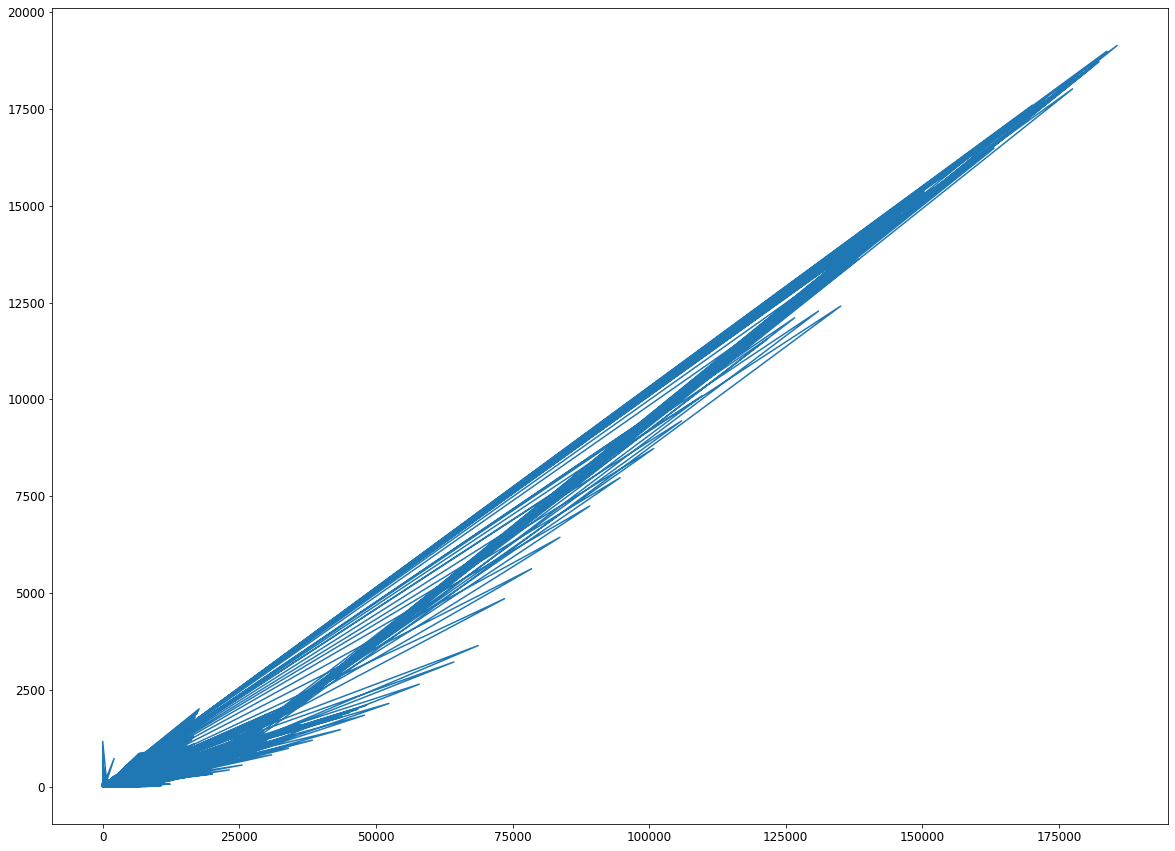

In [53]:
plt.plot(df['cases'],df['deaths'])

In [71]:
k_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
123944,2020-05-07,Sublette,Wyoming,56035.0,3,0
123945,2020-05-07,Sweetwater,Wyoming,56037.0,19,0
123946,2020-05-07,Teton,Wyoming,56039.0,98,1
123947,2020-05-07,Uinta,Wyoming,56041.0,8,0


In [72]:
k_data.drop(['date','county','state'],axis=1,inplace=True)

In [73]:
k_data

,fips,cases,deaths
0,53061.0,1,0
1,53061.0,1,0
2,53061.0,1,0
3,17031.0,1,0
4,53061.0,1,0
...,...,...,...
123944,56035.0,3,0
123945,56037.0,19,0
123946,56039.0,98,1
123947,56041.0,8,0


In [74]:
x1 = k_data[["fips","cases"]]
y1 = k_data["deaths"]

In [75]:
 import statsmodels.api as smf

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,random_state = 25)

In [77]:
x_sm = smf.add_constant(x1)
model = smf.OLS(y1,x1)
results = model.fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          7.241e+05
Date:                Sat, 16 May 2020   Prob (F-statistic):                        0.00
Time:                        23:17:04   Log-Likelihood:                     -6.9813e+05
No. Observations:              123949   AIC:                                  1.396e+06
Df Residuals:                  123947   BIC:                                  1.396e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fips          -0.0002   5.75e-06    -37.071      0.000      -0.000      -0.000
cases          0.0862   7.17e-05   1202.891      0.000       0.086       0.086
==============================================================================
Omnibus:                   104073.774   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2197616627.741
Skew:                          -2.221   Prob(JB):                         0.00
Kurtosis:                     655.304   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This is how much LinearRegression is off by

In [81]:
np.mean(cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-13.029733087343374

In [82]:
lm = Lasso()

In [83]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-13.029689981029385

Lets try to find values for alpha to reduce this. Default value for alpha in lasso is 1 so we will try a range from 1 to 100

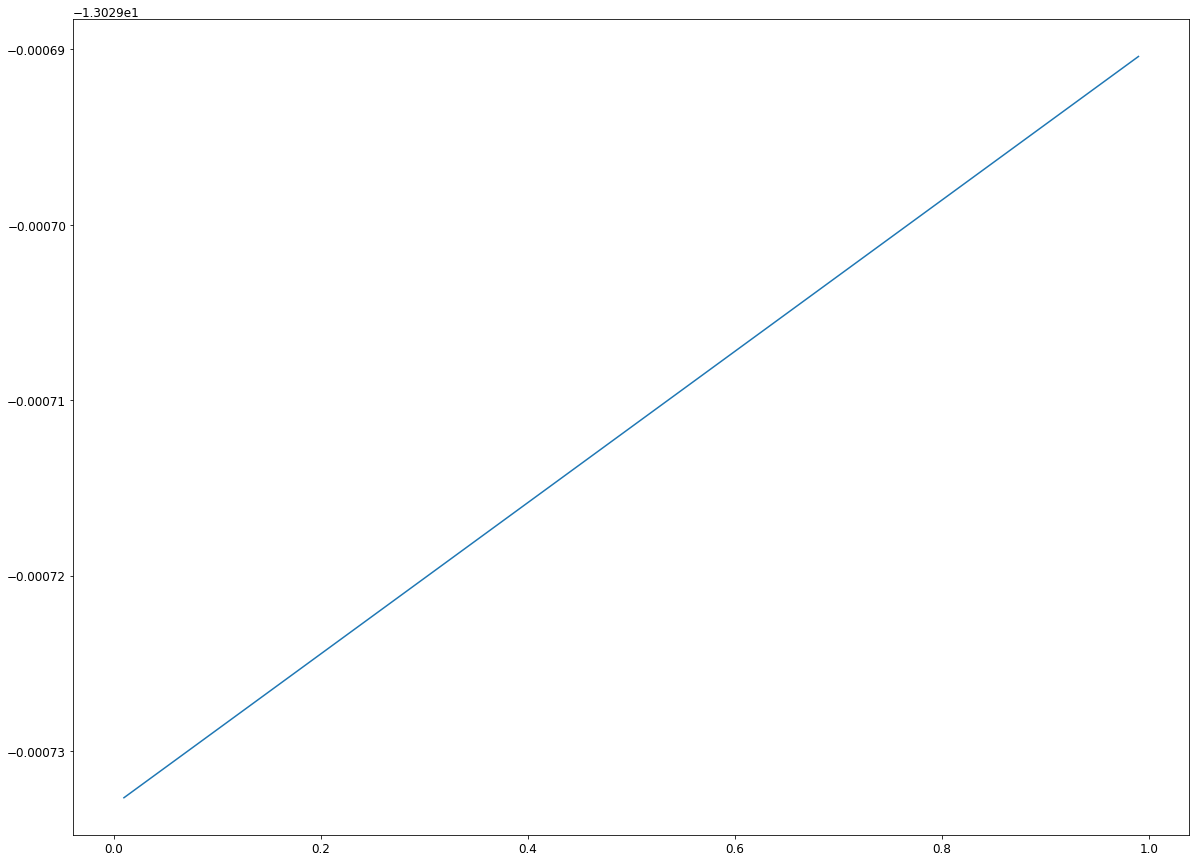

In [84]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lm = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [80]:
print(alpha,error)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] [-13.029732656627354, -13.029732225560714, -13.02973179449405, -13.02973136342741, -13.029730932360764, -13.029730501294111, -13.029730070227473, -13.029729639160808, -13.029729208094173, -13.029728777027538, -13.029728345960885, -13.029727914894265, -13.029727483827601, -13.029727052760952, -13.02972662169431, -13.029726190627633, -13.029725759561023, -13.029725328494372, -13.029724897427732, -13.0297244663610

In [47]:
 from sklearn.ensemble import RandomForestRegressor

In [48]:
clf = RandomForestRegressor()

In [49]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

So Random Forest performs the best. Let use GridSearchCv to find the best parameters for our RandomForestRegression model

In [50]:
np.mean(cross_val_score(clf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-2.0676294188403492

I tried using GridSearchCV but the runtime was too long. I will try using RandomizedSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [55]:
params = {'criterion':('mse', 'mae'), 'n_estimators':[i for i in range(10,100,10)],'max_features':("auto","sqrt","log2")}

In [55]:
grid = GridSearchCV(estimator=clf,param_grid=params,cv=3,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

In [56]:
search = RandomizedSearchCV(estimator=clf,param_distributions=params,cv=3,n_jobs=-1)

In [ ]:
search.fit(X_train,y_train)

In [51]:
from sklearn.metrics import mean_absolute_error

In [53]:
deaths_predicted = clf.predict(X_test)

Our prediction isn't so far off from the actual number of deaths which is good

In [54]:
mean_absolute_error(y_test,deaths_predicted)

1.5946710774447395

Putting the model into production

In [85]:
import pickle
pickl = {'model':clf}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [86]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [87]:
X_test.iloc[1,:]

fips     34031.0
cases      141.0
Name: 8974, dtype: float64

This a test run for the first row. We predict that there will be approximately 2.7 deaths given this fip location and number of cases

In [89]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([2.7])

In [92]:
list(X_test.iloc[1,:])

[34031.0, 141.0]